In [1]:
import json
import pandas as pd
from glob import glob
from collections import Counter
from datetime import date as dt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
#read in json files
tw = []
files = glob("data/TweetCollection/*.json")
for f in files:
    with open(f, 'r',encoding='utf-8') as fin:
        for line in fin:
            tw.append(json.loads(line))

In [3]:
#create a dataframe
df = pd.DataFrame(tw)[['id_str','created_at','text']]
df['created_at'] = pd.to_datetime(df.created_at)
del tw
df.head()

,id_str,created_at,text
0,688103460634415104,2016-01-15 21:00:24,RT @TheDailyShow: #FlintWaterCrisis could have...
1,688103392388882433,2016-01-15 21:00:07,You can thank the Republican party for this #M...
2,688103487205322752,2016-01-15 21:00:30,RT @TheDailyShow: #FlintWaterCrisis could have...
3,688103398462205952,2016-01-15 21:00:09,Snyder still won’t say when he knew about #Fli...
4,688103509611294721,2016-01-15 21:00:35,RT @TheDailyShow: #FlintWaterCrisis could have...


In [20]:
month = 
tweets = ' '.join(df[df.created_at.dt.month == month].text.tolist())
words = ' '.join([w for w in tweets.replace("\'s", '').split()
                  if not (('http' in w) or (w.startswith('@')) or (w in ('RT','via')))])

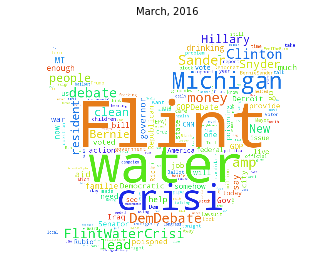

In [21]:
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
from PIL import Image
import numpy as np
import calendar
#mask = imread('twitter_mask.png', flatten=True)
mask = np.array(Image.open("twitter_mask.png"))
wc = WordCloud(mask=mask,background_color='white',stopwords=STOPWORDS,width=2200,height=1400).generate(words)
plt.figure().suptitle(calendar.month_name[month]+', 2016')
plt.axis('off')
plt.imshow(wc)
plt.savefig('figs/wc_'+calendar.month_name[month]+'.png', dpi=300, bbox_inches='tight')

In [14]:
calendar.month_name[month]

'April'